## Préparation

### Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import seaborn as sns
%matplotlib notebook

from sklearn import cluster, metrics
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from fonctions import *

### Data

In [2]:
df_etude = pd.read_csv('df_etude.csv')

In [3]:
df_etude.head()

,Zone,Croissance PIB,Importations - Quantité,PIB,PIB par habitant,Population,Production,Stabilité
0,Afrique du Sud,17.77,514.0,349006.69,12701.3,57009.76,1667.0,-0.28
1,Albanie,9.77,38.0,13019.73,12771.0,2884.17,13.0,0.38
2,Algérie,6.29,2.0,170096.98,11737.4,41389.19,275.0,-0.92
3,Allemagne,6.44,842.0,3690849.15,52952.9,82658.41,1514.0,0.59
4,Angola,20.77,277.0,122123.86,7310.9,29816.77,42.0,-0.33


In [5]:
df_etude.set_index('Zone', inplace=True)
print(df_etude.shape)
#df_etude.head()

(165, 7)


In [6]:
#Outliers -- A revoir --
df_etude.drop(['Brésil', 'États-Unis d\'Amérique', 'Inde'], inplace = True)

## Analyse des données

### Partitionnement des données avec un algorithme de clustering hiérarchique et  l'utilisation d'une Classification ascendante hiérarchique. (CAH), avec en sortie un Dendrogramme.

##### Récupération des valeurs et des étiquettes

In [7]:
X = df_etude.select_dtypes('number') #Récupération des valeurs
print('X', X.shape)

X (162, 7)


In [8]:
y = df_etude.index #Sauvegarde des noms des zones
print('y', y.shape)

y (162,)


##### Normalisation des données

In [9]:
#Normalisation
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=X.columns).round(2)
print('X_scaled', X_scaled.shape) 

X_scaled (162, 7)


In [10]:
X_scaled.head()

,Croissance PIB,Importations - Quantité,PIB,PIB par habitant,Population,Production,Stabilité
Zone,,,,,,,
Afrique du Sud,1.71,2.32,0.16,-0.43,1.29,1.97,-0.79
Albanie,0.33,-0.24,-0.37,-0.42,-0.44,-0.46,0.21
Algérie,-0.27,-0.44,-0.13,-0.47,0.79,-0.08,-1.77
Allemagne,-0.24,4.08,5.43,1.34,2.12,1.75,0.53
Angola,2.22,1.04,-0.20,-0.66,0.42,-0.42,-0.87


##### Dendrogramme

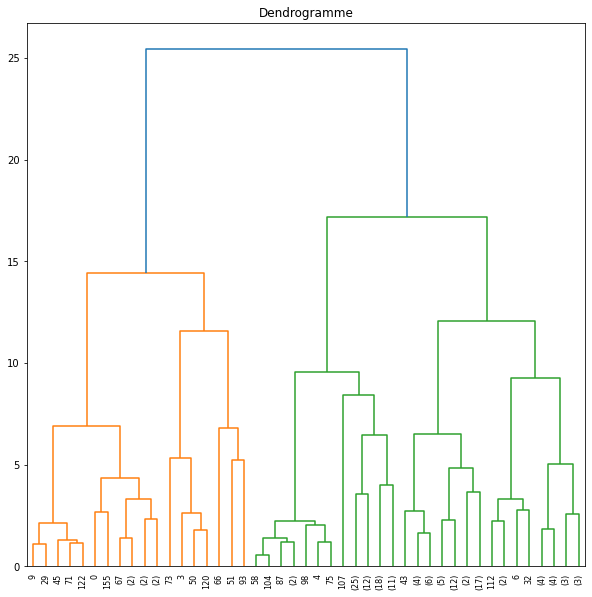

In [11]:
Z = linkage(X_scaled, 'ward')
%matplotlib inline
fig = plt.figure(figsize=(10, 10))
dn = dendrogram(Z ,truncate_mode="level", p=5);
plt.title('Dendrogramme');
plt.savefig('cah.png')

###### Nous retrouvons ici 3 clusters

### K-Means

In [12]:
X = df_etude

In [13]:
#Normalisation des données
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.70545143,  2.31852346,  0.15607276, ...,  1.29294735,
         1.97092156, -0.79303276],
       [ 0.33172008, -0.24478991, -0.37393202, ..., -0.44352923,
        -0.46489488,  0.2124346 ],
       [-0.26585305, -0.43865395, -0.12614951, ...,  0.79180263,
        -0.07905213, -1.76803141],
       ...,
       [-0.59726574, -0.44942417, -0.2299479 , ...,  0.00245373,
         0.01667222, -0.47311132],
       [-0.37918589, -0.44942417, -0.39413398, ..., -0.5341975 ,
        -0.48403975,  0.95891794],
       [-0.03403589, -0.4171135 , -0.39212945, ..., -0.51565454,
        -0.48403975, -0.06178377]])

#### Silhouette method

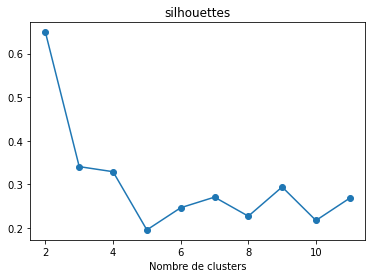

<Figure size 432x288 with 0 Axes>

In [18]:
# Résultat pour 2 a 12 clusters
silhouettes = []
for num_clusters in range(2, 12):
    cls = cluster.KMeans(n_clusters=num_clusters,
                        n_init =1, init='k-means++')
    cls.fit(X_scaled)
    silh = metrics.silhouette_score(X_scaled, cls.labels_)
    silhouettes.append(silh) 
plt.plot(range(2, 12), silhouettes, marker ='o')
plt.title('silhouettes')
plt.xlabel('Nombre de clusters')
plt.show()
plt.savefig('silhouette')

In [19]:
cluster_k = 2

###### D'aprés le coefficient de silhouettes nous pouvons envisager 2 clusters, on explique 55% de la variance des données.

In [21]:
# Donnée expliqué en fonction du nombre de cluster retenue
pca = decomposition.PCA(n_components = 7)
pca.fit(X_scaled)
tableau_variance = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(7)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
tableau_variance

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,2.934127,42.0,42.0
1,Dim2,1.705916,24.0,66.0
2,Dim3,1.010245,14.0,80.0
3,Dim4,0.560509,8.0,88.0
4,Dim5,0.415694,6.0,94.0
5,Dim6,0.227937,3.0,97.0
6,Dim7,0.189051,3.0,100.0


In [40]:
# Model k-means avec 2 clusters
kmeans = KMeans(init='k-means++', n_clusters=cluster_k, n_init=7)
# Ajuste les donnée au model, sur 2 clusters
kmeans.fit(X_scaled)
# Determine à quel clusters appartient chaque individu
clusters =  kmeans.predict(X_scaled)

In [41]:
# Affiche le numéros de cluster de la Zone
X_scaled_clustered = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_clustered['cluster'] = clusters
#X_scaled_clustered.head()

In [42]:
#Nombre d'individu par cluster
from collections import Counter
Counter(kmeans.labels_)

Counter({0: 22, 1: 140})

### Centroide

In [43]:
# Création d'un model PCA à 2 dimensions pour afficher nos données sur 2 dimensions
pca = PCA(n_components=2)
pca.fit(X_scaled)
# Transfere les données sur le nouveau PCA 2D
X_reduced = pca.transform(X_scaled)

In [44]:
# Convertion des résultats en dataframe
X_reduceddf = pd.DataFrame(X_reduced, index=X.index, columns=['PC1','PC2'])
X_reduceddf['cluster'] = clusters
X_reduceddf.head()

,PC1,PC2,cluster
Zone,,,
Afrique du Sud,2.736987,-1.531940,0
Albanie,-0.829948,-0.080111,1
Algérie,0.048535,-1.673809,1
Allemagne,6.798703,1.698884,0
Angola,0.296292,-1.431515,1


In [45]:
centres_reduced = pca.transform(kmeans.cluster_centers_)
X_trans = pca.transform(X_scaled)

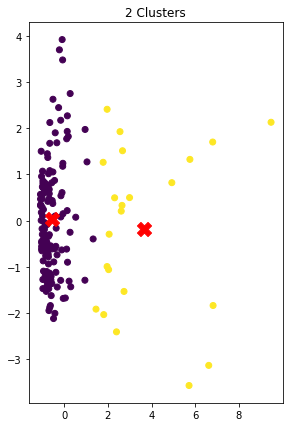

In [46]:
fig = plt.figure(figsize=(10,7))
cls3 = cluster.KMeans(n_clusters=cluster_k)
cls3.fit(X_scaled)
ax = fig.add_subplot(121)
plt.title('2 Clusters')
ax.scatter(X_trans[:,0], X_trans[:, 1], c=cls3.labels_)
plt.scatter(centres_reduced[:,0],centres_reduced[:,1],s = 200, c = 'r',marker = 'X')
plt.savefig('centroide.png')

In [29]:
centres_reduced

array([[ 3.63880856, -0.18978283],
       [-0.57181277,  0.02982302]])

### Analyse en composantes principales (PCA).

In [31]:
num_components = 7
pca = PCA(n_components=num_components)
pca.fit(X_scaled)

PCA(n_components=7)

### Analyse des resultats

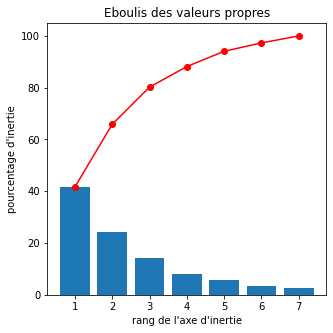

<Figure size 432x288 with 0 Axes>

In [32]:
fig = plt.figure(figsize=(5, 5))
display_scree_plot(pca)
plt.savefig('eboulis.png')

###### Avec 2 composantes, on explique 55% de la variance des données.

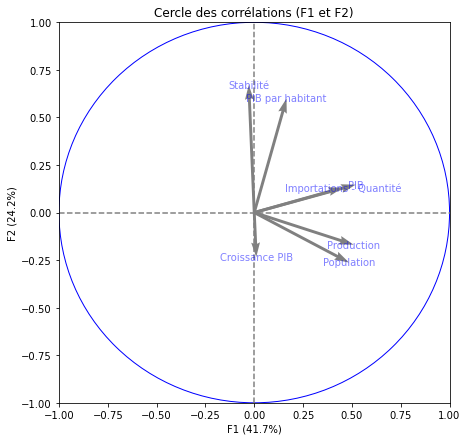

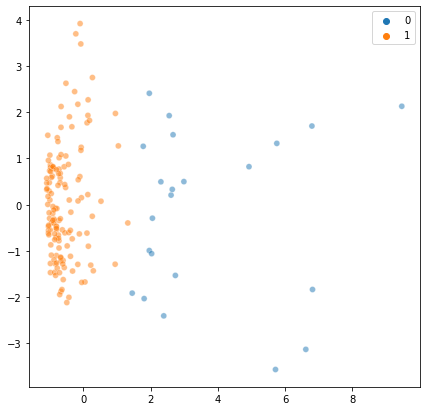

In [33]:
#Projection des individu avec leur rank_stabilité sur un espace vectoriel 
X_projected = pca.transform(X_scaled)
#display_factorial_planes(X_projected, num_components, pca, [(0,1)], illustrative_var = classed_data.rank_stabilité, alpha = 0.5)


pcs = pca.components_ 
display_circles(pcs, num_components, pca, [(0,1)], labels = np.array(X.columns))
fig = plt.figure(figsize=(7, 7))
sns.scatterplot(x = X_trans[:,0], y = X_trans[:, 1], hue=clusters, alpha = 0.5)
plt.savefig('individu_point.png')

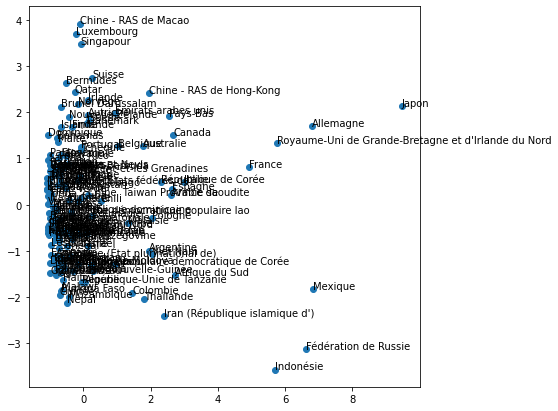

In [34]:
fig = plt.figure(figsize=(7, 7))
plt.scatter(X_projected[:,0], X_projected[:, 1])
for i, (x, y) in enumerate(zip(X_projected[:, 0],
                              X_projected[:,1])):
    plt.text(x, y, X.index[i] )
    plt.savefig('individu.png')

### Heatmap

In [35]:
heatmap = X_scaled_clustered.groupby(['cluster']).mean()
print(heatmap.shape)
#heatmap.head()

(2, 7)


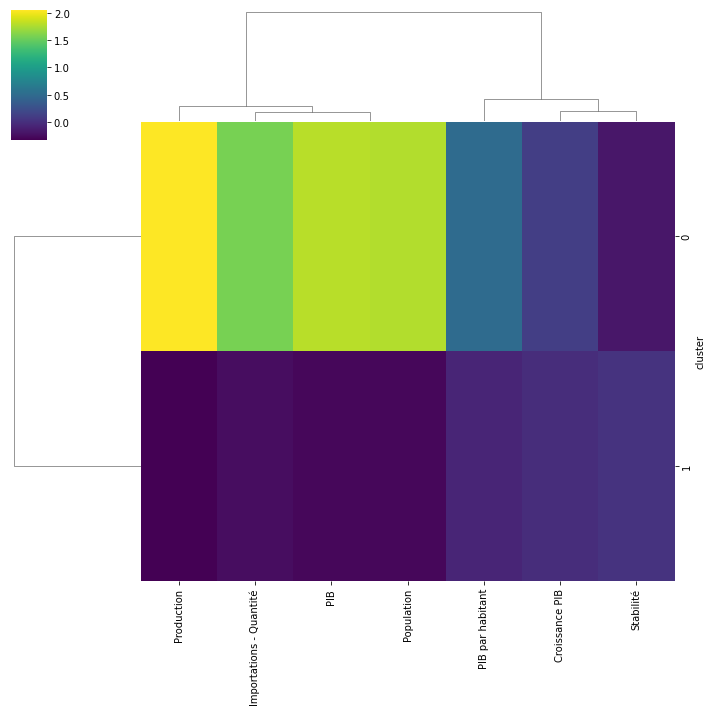

In [36]:
sns.clustermap(heatmap, cmap = 'viridis', method = 'ward')
plt.savefig('heatmap.png')

In [37]:
n = 0

In [38]:
cluster_v = X_scaled_clustered[(X_scaled_clustered['cluster'] == n)]
print(cluster_v.shape)
cluster_v.head(23)

(22, 8)


,Croissance PIB,Importations - Quantité,PIB,PIB par habitant,Population,Production,Stabilité,cluster
Zone,,,,,,,,
Afrique du Sud,1.705451,2.318523,0.156073,-0.425117,1.292947,1.970922,-0.793033,0
Allemagne,-0.240096,4.084840,5.427684,1.343789,2.115817,1.745601,0.532356,0
Arabie saoudite,-0.183429,3.438627,0.691744,1.095638,0.525904,0.423133,-1.250063,0
Argentine,1.305352,-0.406343,0.620826,0.053712,0.873547,2.698427,-0.107487,0
Australie,0.051822,-0.363262,1.840444,1.147336,0.252672,1.384794,0.989387,0
Canada,0.017479,0.530666,2.207574,1.140063,0.642392,1.602751,1.309308,0
Chine - RAS de Hong-Kong,-0.253833,4.434873,0.143824,1.646856,-0.301656,-0.448695,0.897981,0
Colombie,0.417578,-0.029385,0.097513,-0.360516,1.033083,1.819235,-1.539516,0
Espagne,-0.224641,0.654524,1.676003,0.753855,0.960499,1.747074,0.060091,0


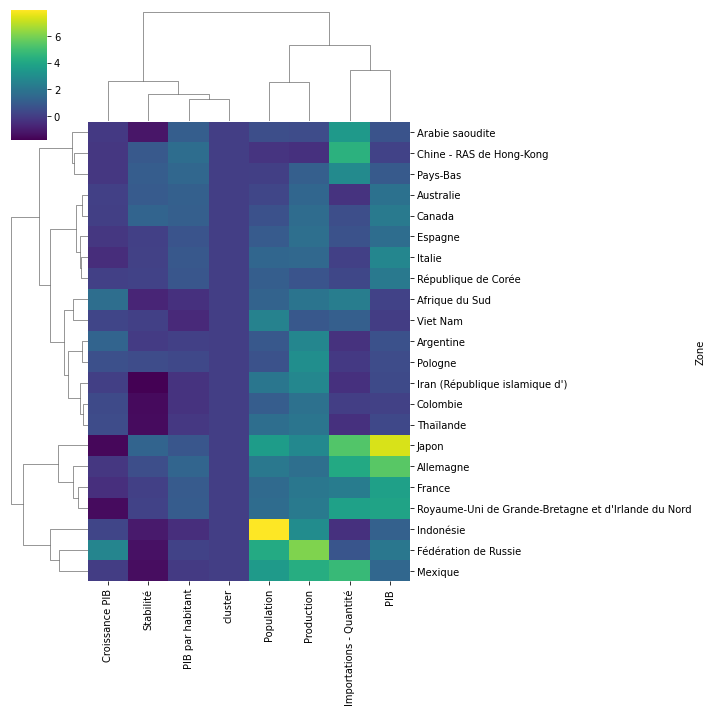

In [39]:
sns.clustermap(cluster_v, cmap = 'viridis', method = 'ward')
plt.savefig('heatmap_pays_valide.png')

In [101]:
cluster_0 = X_scaled_clustered[(X_scaled_clustered['cluster'] == 0)]
print(cluster_0.shape)
#cluster_0.head()

(31, 13)
